# AIMs Positions, Populations and MAFs

## General settings and loading of files

In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

%run helpers/data_munging_functions.py
%run helpers/number_helpers.py
%run general_settings.py

/home/juan/anaconda3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/home/juan/repos/tesina/panels/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]


[07:54:51] 'panels' dict
[07:54:51] 'galanter', 'present', 'missing' dataframes
[07:54:51] 'panel_labels'
[07:54:51] 'panel_names' dict
[07:54:51] 'panel_rsIDs' dict
[07:54:51] 'genome' dataframe
[07:55:04] 'control_genotypes' huge datagrame
[07:55:04] 'control_rsIDs' dict to filter it ^
[07:55:04] 'cp_factors' list
[07:55:04] 'control_labels'
[07:55:04] 'control_names' dict
[07:55:04] 'df_1000G_samples'
[07:55:04] 'df_1000G_SNPs'
[07:55:04] 'df_1000G_genotypes'
[07:55:04] 'df_1000G_populations'
[07:55:04] 'df_1000G_genotypes_alleles'
[07:55:04] 'mafs' dataframe


/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


## Compare the panels

In [114]:
from panels.panel_analyser import PanelAnalyser


analyser = PanelAnalyser()
count_comparison = analyser.compare_panel_lengths({**panels, **control_rsIDs})
ancestry_comparison = analyser.compare_AIMs_ancestry(panels)
lsbl_comparison = analyser.compare_LSBL(panels)

print("== Counts\n")
print(count_comparison)
print()

print("== Counts per ancestry\n")
print(ancestry_comparison)
print()

print("== LSBL cumsum per ancestry\n")
print(lsbl_comparison)


== Counts

             AIMs count  Ratio
Panel                         
GAL_Completo        445   1.00
GAL_Affy            180   0.40
CPx100           43,144  96.95
CPx10             4,424   9.94
CPx1                438   0.98

== Counts per ancestry

    GAL_Completo                    GAL_Affy                 
      AIMs count Panel Percentage AIMs count Panel Percentage
AFR          114              26%         62              34%
EUR          202              45%         71              39%
NAM          129              29%         47              26%

== LSBL cumsum per ancestry

           GAL_Completo           GAL_Affy         
              LSBL(Fst) LSBL(In) LSBL(Fst) LSBL(In)
population                                         
AFR                72.4     43.5      39.6     23.7
EUR                77.9     44.0      28.3     15.9
NAM                74.5     44.0      27.0     16.0


En GAL_Affy observamos un aumento de la proporción de AIMs africanos respecto de los europeos, mientras que la proporción de AIMs americanos sigue igual. Esto podría tener por consecuencia, a primera vista, una sobreestimación del componente africano al usar GAL_Affy. No obstante, debe calcularse el LSBL acumulado de los SNPs de cada grupo y comparar *ese* valor.

Los AIMs que quedan en GAL_Affy siguen balanceados en cuanto a LSBL para determinar los componentes EUR y NAM. EL valor de LSBL queda relativamente más alto que en GAL_Completo, por lo que debemos estar atentos a posibles diferencias en resultado entre GAL_Affy y GAL_Completo que afecten específicamente al componente ancestral africano --en particular, que lo sobreestimen.

Sin embargo, esto no parece ser un problema en nuestros resultados, al menos para las muestras de 1000 Genomas utilizadas. La comparación de proporción de ancestría africana estimada para las diferentes poblaciones parece mantenerse igual entre ambos paneles, a pesar de esa reducción diferencial de AIMs. Con todo, este _caveat_ quedará para futuros usos de GAL_Affy.

/home/juan/repos/tesina/panels/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]


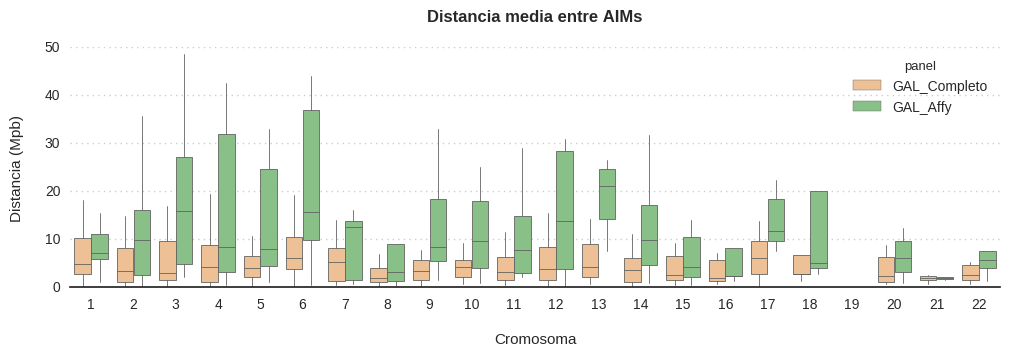

In [229]:
from plotters.snp_distances import SnpDistances


SnpDistances().boxplot()

## Comparar Galanter de PLoS / dbSNP / ...

In [5]:
# galanter_remapped = pd.read_csv("/home/juan/tesina/files/galanter.GRCh38.p6.bed", sep="\t",
#                                names=['chr', 'position', 'pos_to', 'id'], comment="#", skiprows=3,
#                                usecols=['chr', 'position', 'pos_to', 'id'])

# # The online remapping generated weird chromosomes
# weird_chromosomes = galanter_remapped["chr"].str.contains("_")
# galanter_remapped.drop(galanter_remapped[weird_chromosomes].index, inplace=True)

# galanter_remapped['chr'] = galanter_remapped['chr'].str.replace("chr", "").astype(int)
# galanter_remapped.drop_duplicates("id", keep="last", inplace=True)
# galanter_remapped.set_index('id', inplace=True)

# galanter_plos = galanter[['chr', 'position']]

# import re

# galanter_dbSNP = pd.read_csv("/home/juan/tesina/files/galanter_rsIDs_dbSNP",
#                              names=['id', 'source', 'chr', 'pos', 'pos_to'], skiprows=1).set_index('id')
# take_these_out = galanter_dbSNP.chr.str.contains('HSCHR')
# galanter_dbSNP = galanter_dbSNP[~take_these_out]
# galanter_dbSNP['chr'] = galanter_dbSNP['chr'].astype(int)
# galanter_dbSNP = galanter_dbSNP.drop_duplicates()

# galanter.index.difference(galanter_remapped.index)

# print(galanter.index.difference(galanter_remapped.index))
# print(galanter_remapped.index.difference(galanter.index))

Debería usar las posiciones de el build `GRCh38.p6` en `galanter_remapped`, pero no están todas puede ser? Chequear

## Graficar la distribución cromosómica de los AIMs

* Chromosome lengths were taken from:

[Assembly Statistics for GRCh38.p6 Release date: December 23, 2015](http://www.ncbi.nlm.nih.gov/projects/genome/assembly/grc/human/data/)

* Centromere ranges were taken from the FTP server: 

ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000001405.21_GRCh38.p6/GCA_000001405.21_GRCh38.p6_assembly_structure/genomic_regions_definitions.txt



In [13]:
distances = {}

for panel_name, panel in {"GAL_Completo": galanter, "GAL_Affy": present}.items():
    temp_dict = snp_distances_per_chromosome(panel, genome)

    for chromosome, chr_distances in temp_dict.items():
        temp_dict[chromosome] = (np.mean(chr_distances),
                                 np.std(chr_distances),
                                 np.median(chr_distances))
    
    distances[panel_name] = pd.DataFrame(temp_dict).T.astype(int)
    distances[panel_name].columns = ["mean", "std", "median"]

distances_df = distances["GAL_Completo"].join(distances["GAL_Affy"], rsuffix="_Affy")

# Pensé que representarlo en una tabla sería mejor, pero tal vez no.
# El boxplot es más informativo más rápidamente, y más intuitivo.
# distances_df

El archivo `galanter.bed` con las posiciones de los AIMs reportadas por Galanter *et al.* correspondía al genoma de referencia `GRCh37.p5`. La conversión al build `GRCh38.p6` fue realizada online con la herramienta de *remapping* provista por NCBI Genome Tools, de modo que fueran coherentes con la información sobre longitud total de los cromosomas y rango de los centrómeros.

http://www.ncbi.nlm.nih.gov/genome/tools/remap

In [14]:
galanter["pos"] = galanter_remapped["position"]

## Generate CONTROL PANELS of random SNPs

- Extract the **same amount * factor** of SNPs per chromosome as Galanter has,
  with some min space between them.
- The SNPs to extract should all be present in LAT-1

In [15]:
galanter.groupby("chr").size().to_csv("data/chr_SNP_count_in_galanter")

In [16]:
# === WARNING ====
# Running this cell took 26 minutes. I already got the spn_lists written to files
# in the following cell, so there's no reason to run this again.


# from math import floor
# import time

# control_panels = {}

# for exponent in [0, 1, 2]:
#     factor = 10 ** exponent
#     print("== Control Panel x {} ==\n".format(factor))
#     number_of_snps_to_take = galanter.groupby("chr").size() * factor

#     control_panels[factor] = {}
    
#     for chromosome, snps_number in number_of_snps_to_take.items():            
#         this_chromosome = lat[lat["Chromosome"] == str(chromosome)]
#         positions = this_chromosome["Position End"]
        
#         # I will maximize the distance between indices of the positions list
#         # as a proxy to maximize the distance between the positions in the chromosome ;)
#         distance_between_indices = floor(len(positions) / snps_number)
#         positions_to_take = [positions[n * distance_between_indices]
#                              for n in np.arange(snps_number)]

#         indices_to_take = positions[positions.isin(positions_to_take)].index.unique()
#         control_panels[factor][chromosome] = indices_to_take
        
#         print("[{}] Chr {}, {} to take, {} were taken".format(time.strftime("%H:%M:%S"),
#                                                               chromosome, snps_number,
#                                                               len(control_panels[factor][chromosome])))

In [17]:
# import os

# for factor, snp_dic in control_panels.items():
#     for chromosome, snp_list in snp_dic.items():
#         basedir = "/home/juan/tesina/1000Genomes_data/new_control_panels/"
#         fn = "control_panel_x{}.chr_{}.snp_list_to_take_{}".format(factor, chromosome, len(snp_list))
#         with open(os.path.join(basedir, fn), "w") as dest_file:
#             dest_file.write("\n".join(snp_list) + "\n")

^ With the generated snp_lists per chromosome, we need to extract those variants
from the 1000 Genomes `*.vcf` files, using PLINK.

The script used with this purpose is `/home/juan/tesina/1000 ... /create_control_panels.sh`

## Plot the distribution of AIMs per chromosome

In [18]:
control_positions = OrderedDict()

for factor in cp_factors:
    rs_ids = control_genotypes[factor].columns
    df = lat.loc[rs_ids][["Chromosome", "Position End"]]
    df.columns = ["chr", "position"]
    df["position"] = df["position"].astype(int)
    df["chr"] = df["chr"].astype(int)
    df.index.name = "rsID"
    control_positions[factor] = df

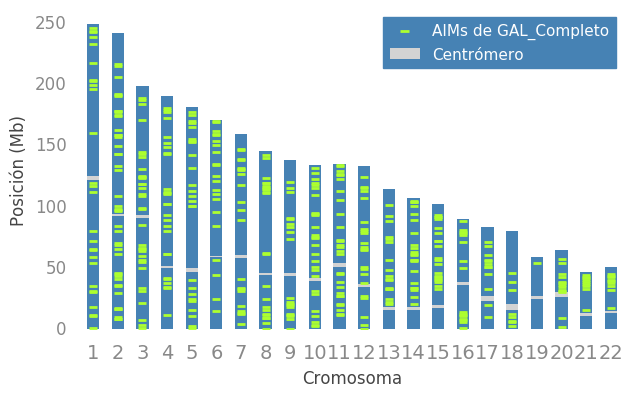

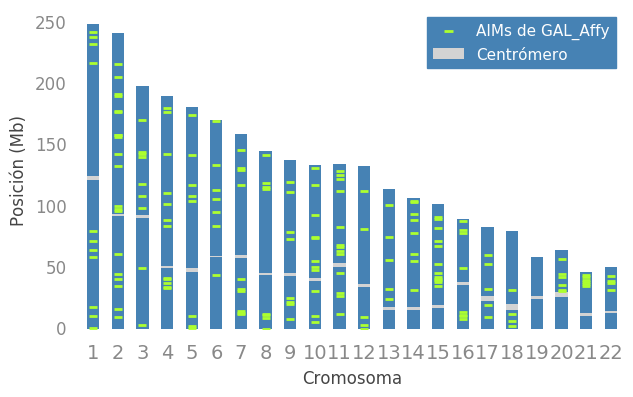

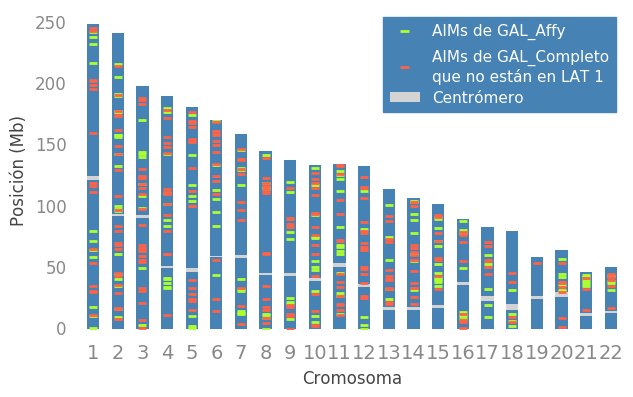

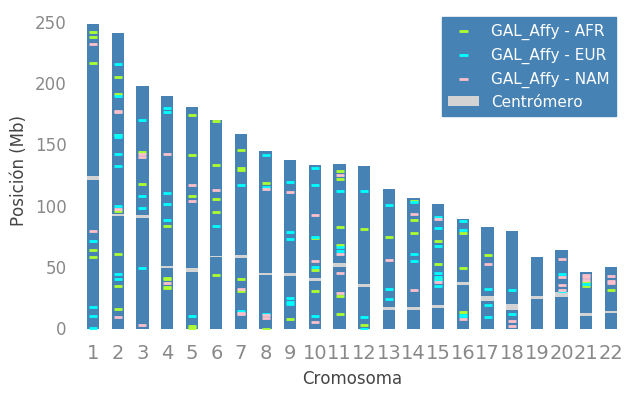

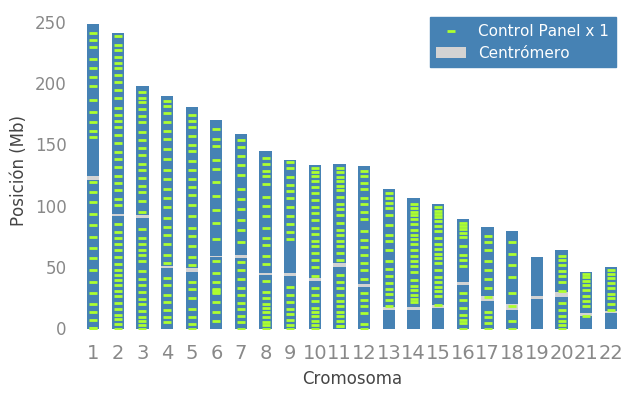

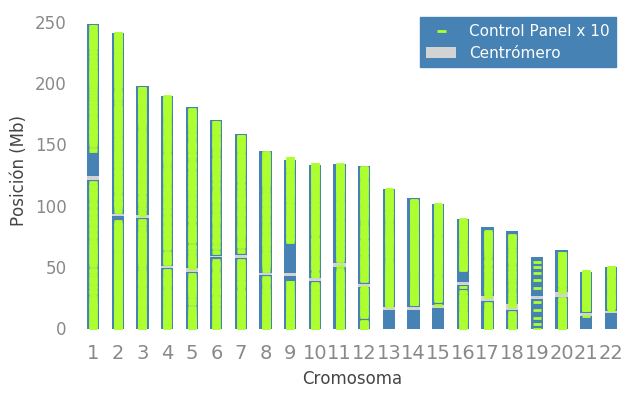

In [19]:
% run chromosomes_with_SNPs_plot.py

from collections import OrderedDict

markersize = 40

plot_settings = [
    # GAL_Completo
    OrderedDict([
        ('AIMs de GAL_Completo',
         {'df': galanter,
          'marker': '_', 'color': 'greenyellow', 's': markersize}),
    ]),
    
    # GAL_Affy
    OrderedDict([
        ('AIMs de GAL_Affy',
         {'df': present,
          'marker': '_', 'color': 'greenyellow', 's': markersize}),
    ]),
    
    # GAL_Completo vs. GAL_Affy
    OrderedDict([
        ('AIMs de GAL_Affy',
         {'df': present,
          'marker': '_', 'color': 'greenyellow', 's': markersize}),
        ('AIMs de GAL_Completo\nque no están en LAT 1',
         {'df': missing,
          'marker': '_', 'color': 'tomato', 's': markersize}),
    ]),
    
    # GAL_Affy different ancestries
    OrderedDict([
        ('GAL_Affy - AFR',
         {'df': present[present.population == "AFR"],
          'marker': '_', 'color': 'greenyellow', 's': markersize}),

        ('GAL_Affy - EUR',
         {'df': present[present.population == "EUR"],
          'marker': '_', 'color': 'cyan', 's': markersize}),

        ('GAL_Affy - NAM',
         {'df': present[present.population == "NAM"],
          'marker': '_', 'color': 'pink', 's': markersize}),
    ]),
    
    # Control Panel x 1
    OrderedDict([
        ('Control Panel x 1',
         {'df': control_positions["1"],
          'marker': '_', 'color': 'greenyellow', 's': markersize}),
    ]),

    # Control Panel x 10
    OrderedDict([
        ('Control Panel x 10',
         {'df': control_positions["10"],
          'marker': '_', 'color': 'greenyellow', 's': markersize}),
    ]),
]

for plot_data in plot_settings:
    chromosomes_with_SNPs_plot(genome, plot_data)
    plt.show()

## Descarga de data de 1000Genomes

In [20]:
# %load /home/juan/tesina/1000genomes/ftp_download_1000_genomes.py

In [21]:
# % run extract_SNPs_from_vcf_chromosomes.py

# commands = extract_SNPs_from_vcf(galanter.index.values)

# ^ One time only run, to extract the SNPs out of the big files of 1000genomes:
# run_commands(commands, "/home/juan/tesina/1000genomes")

In [22]:
whois('CEU')

'Utah Residents (CEPH) with Northern and Western Ancestry'

## Compute MAF by Population (1000 Genomes data)

I use both `plink` and `pandas` for this computation. `pandas` to make the `.fam` files
with either population or subpopulation names in the family field. `plink` to
compute the frequencies using each of the `.fam` files.

In [5]:
# This is used to generate different .fam files (with population and superpopulation data)
# so that plink can generate frequencies relative to those groups.

basedir = "/home/juan/tesina/1000Genomes_data/galanter_beds/"
fam_file_fields = ["fam", "sample", "father", "mother", "sex", "phenotype"]

for panel_name in panel_labels:

    # Read original .fam with no populations info
    fn = basedir + "{}.fam".format(panel_name)
    nofam = pd.read_csv(fn, engine="python", sep="\s*", names=fam_file_fields,
                        index_col="sample")

    # Write the populations info to a new .tfam
    df = nofam.copy()
    df["fam"] = df_1000G_samples["population"]
    df.reset_index(inplace=True)
    df = df[fam_file_fields]
    fn = basedir + "{}.populations.fam".format(panel_name)
    df.to_csv(fn, sep="\t", header=False, index=False)

    # Write the superpopulations info to a new .tfam
    df = nofam.copy()
    df["fam"] = df_1000G_samples["super_population"]
    df.reset_index(inplace=True)
    df = df[fam_file_fields]
    fn = basedir + "{}.superpopulations.fam".format(panel_name)
    df.to_csv(fn, sep="\t", header=False, index=False)

/home/juan/miniconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1572: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/juan/miniconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1574: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


After the previous cell (`.fam` files generation), plink was run to compute the frequencies per population and generate the `.frq.strat` files.

Check the bash script `/home/juan/tesina/1000Genomes_data/galanter_beds/2_compute_freqs.sh`

## Comparar SNPs

In [36]:
print("1000 Genomas:", len(df_1000G_SNPs))
print("Galanter panel:", len(galanter))

1000 Genomas: 442
Galanter panel: 445


**NOTA** sobre los SNPs que faltan: en el proceso de leer la data de 1000 genomas estoy dejando afuera tres SNPs, porque tienen más de 2 variantes.

In [29]:
missing_in_1000g = set(galanter.index) - set(df_1000G_SNPs.index)
galanter.loc[missing_in_1000g]

,chr,position,A1,A2,NAM_AF,EUR_AF,AFR_AF,population,LSBL(Fst),LSBL(In),pos
SNP rsID,,,,,,,,,,,
rs2242865,21,15948902,G,T,0.011,0.156,0.932,AFR,0.695,0.422,14282390
rs10071261,5,1066694,T,C,0.107,0.086,0.903,AFR,0.650,0.375,1013463
rs12065716,1,116575568,G,C,0.389,0.885,0.136,EUR,0.372,0.207,115688801
rs2510719,11,126511001,A,C,0.034,0.574,0.039,EUR,0.341,0.196,127266000


### Crear listas de SNPs ya filtradas para GAL total y GAL parcial

In [30]:
df_1000G_SNPs.index.values.tofile(
    "/home/juan/tesina/admixture/galT.snps", sep="\n", format="%s"
)
df_1000G_SNPs.index.intersection(present.index).values.tofile(
    "/home/juan/tesina/admixture/galP.snps", sep="\n", format="%s"
)

In [39]:
def minidescribe(df):
    df = df.join(mafs["population"]["GAL_Completo"]).loc[:, "ACB":"YRI"]
    df = df.describe().loc[["mean", "std"]].T
    df = df.applymap(lambda x: round(x, 2))
    df["mean ± std"] = df["mean"].astype(str) + " ± " + df["std"].astype(str)
    return df

galanter_summary = minidescribe(galanter)
present_summary = minidescribe(present)

# This uses Galanter-provided MAFs!
maf_mean_comparison = galanter_summary.join(present_summary, rsuffix="_")
maf_mean_comparison["Difference"] = maf_mean_comparison["mean"] - maf_mean_comparison["mean_"]
maf_mean_comparison.drop(["mean", "std", "mean_", "std_"], axis=1, inplace=True)
maf_mean_comparison.columns = ["GAL_Completo", "GAL_Affy", "Difference"]

print("Comparación usando los MAFs provistos **por 1000 Genomas**")
maf_mean_comparison.head()

Comparación usando los MAFs provistos **por 1000 Genomas**


,GAL_Completo,GAL_Affy,Difference
ACB,0.17 ± 0.1,0.18 ± 0.1,-0.01
ASW,0.23 ± 0.1,0.25 ± 0.1,-0.02
BEB,0.31 ± 0.12,0.28 ± 0.13,0.03
CDX,0.27 ± 0.14,0.26 ± 0.15,0.01
CEU,0.22 ± 0.12,0.2 ± 0.12,0.02


^ Entre ambos paneles no hay ninguna población cuyos MAFs (promediados para todos los AIMs!) cambien demasiado. Es un comienzo.

## Plot the mean MAFs

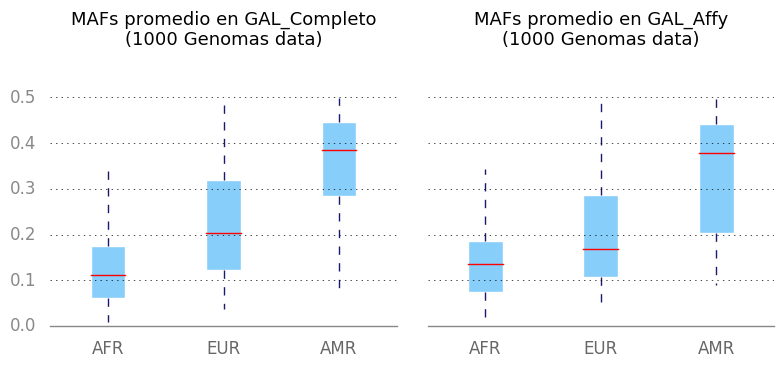

In [61]:
level = "superpopulation"
populations_to_plot = ['AFR', 'EUR', 'AMR']

nrows = 1
ncols = 2
plot_width = 4
plot_height = 4

fig, axes = plt.subplots(nrows, ncols, sharey=True)
fig.set_figwidth(ncols * plot_width)
fig.set_figheight(nrows * plot_height)

for i, panel_name in enumerate(["GAL_Completo", "GAL_Affy"]):
    
    plot_title = "MAFs promedio en {}\n(1000 Genomas data)".format(panel_name)    
    df = mafs[level][panel_name][populations_to_plot]
    ax = axes[i]

    rot = 90 if len(populations_to_plot) > 5 else 0
    bp = df.boxplot(ax=ax, rot=rot, patch_artist=True, return_type="dict",
                    showfliers=False, showcaps=False)
    
    ax.set_title(plot_title, y=1.2, fontsize=13)
    
    for patch in bp["boxes"]:
        patch.set_facecolor("LightSkyBlue")
        patch.set_edgecolor("white")
    for whisker in bp["whiskers"]:
        whisker.set_color("MidnightBlue")
    for xlabel in ax.get_xticklabels():
        xlabel.set_color("#666666")

    ax.xaxis.grid()
    hide_spines_and_ticks(ax)

plt.tight_layout()
plt.show()

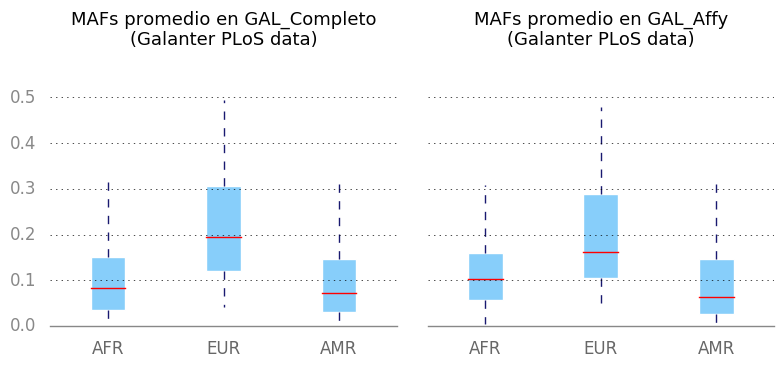

In [64]:
level = "superpopulation"

nrows = 1
ncols = 2
plot_width = 4
plot_height = 4

fig, axes = plt.subplots(nrows, ncols, sharey=True)
fig.set_figwidth(ncols * plot_width)
fig.set_figheight(nrows * plot_height)

for i, (panel_label, panel) in enumerate(panels.items()):
    
    plot_title = "MAFs promedio en {}\n(Galanter PLoS data)".format(panel_label)    
    df = panel[["AFR_AF", "EUR_AF", "NAM_AF"]]
    df.columns = ["AFR", "EUR", "AMR"]
    df = df.applymap(lambda x: 1 - x if x >= 0.5 else x)
    ax = axes[i]

    rot = 90 if len(populations_to_plot) > 5 else 0
    bp = df.boxplot(ax=ax, rot=rot, patch_artist=True, return_type="dict",
                    showfliers=False, showcaps=False)
    
    ax.set_title(plot_title, y=1.2, fontsize=13)
    
    for patch in bp["boxes"]:
        patch.set_facecolor("LightSkyBlue")
        patch.set_edgecolor("white")
    for whisker in bp["whiskers"]:
        whisker.set_color("MidnightBlue")
    for xlabel in ax.get_xticklabels():
        xlabel.set_color("#666666")

    ax.xaxis.grid()
    hide_spines_and_ticks(ax)

plt.tight_layout()
plt.show()

^ Should mean continental MAFs be similar between 1000 Genomes samples and the ones in Galanter csv? They are not.

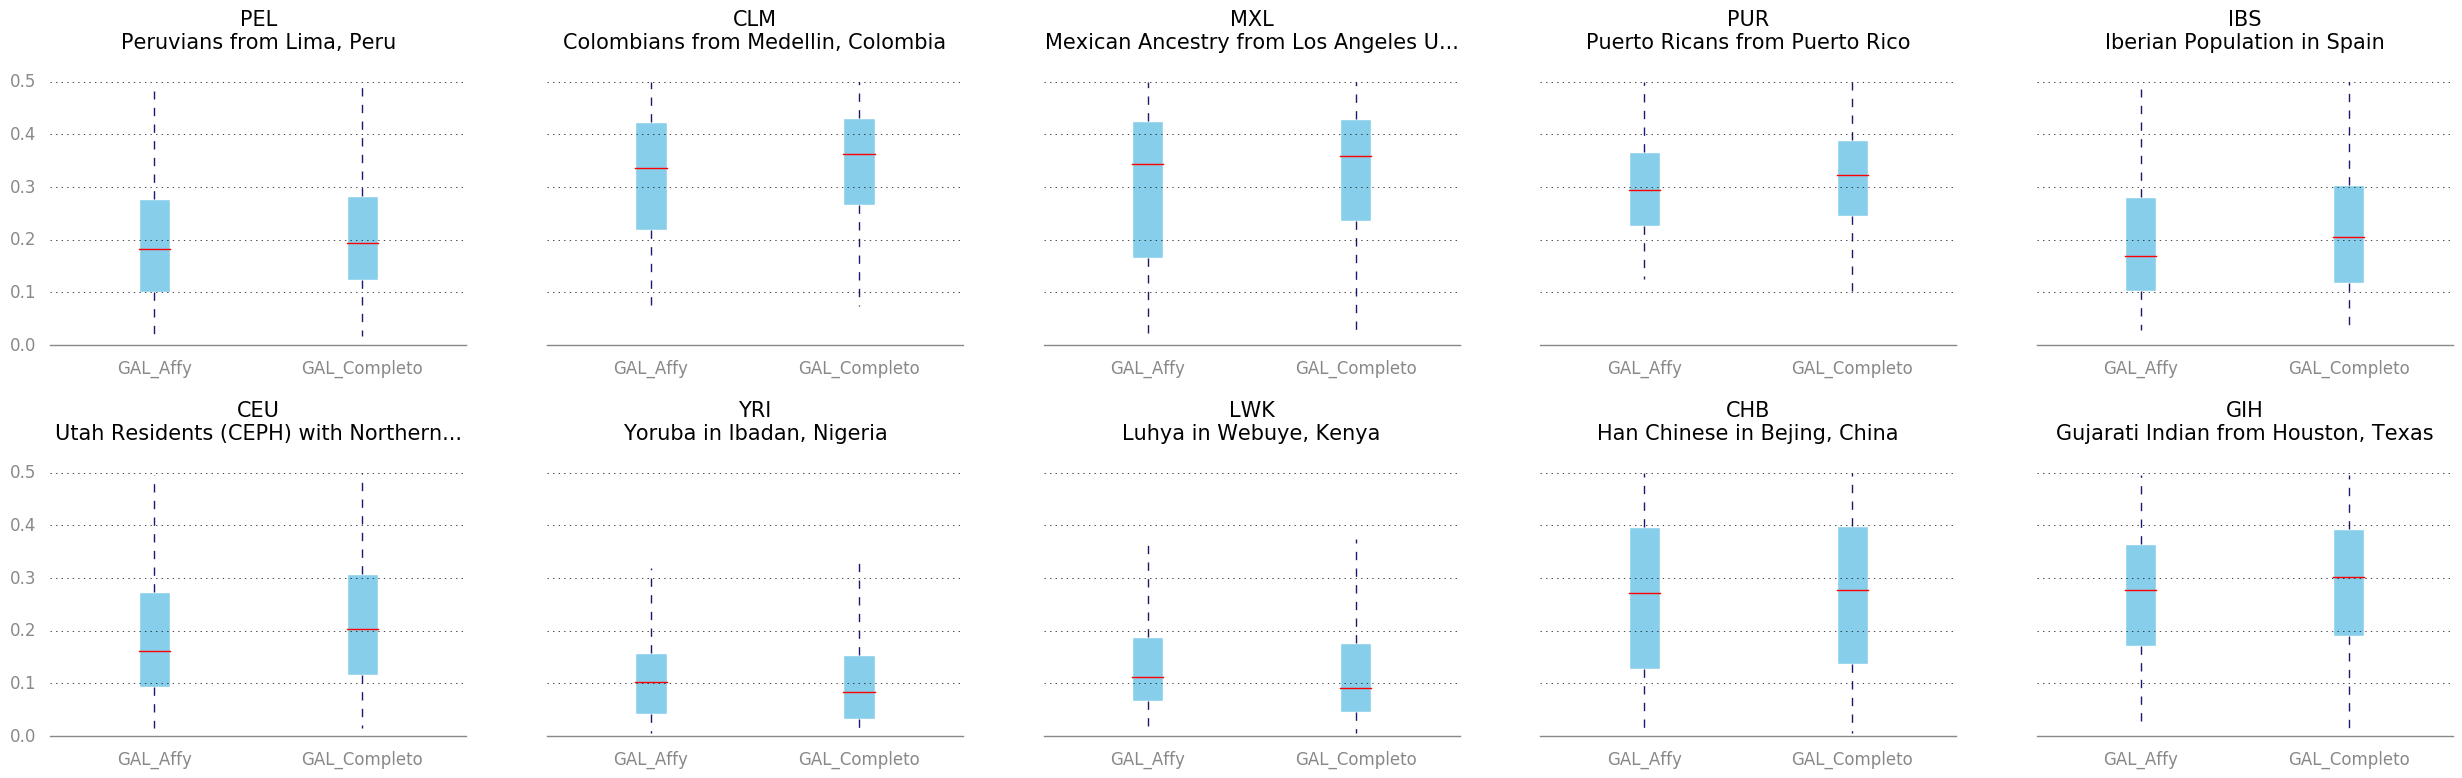

In [66]:
from helpers.text_helpers import trunc_text
from math import ceil

populations_to_plot = ["PEL", "CLM", "MXL", "PUR",
                       "IBS", "CEU", "YRI", "LWK",
                       "CHB", "GIH"]

plot_width = 5
plot_height = 4
ncols = 5
nrows = ceil(len(populations_to_plot) / ncols)

pops_matrix = np.array(populations_to_plot)
pops_matrix.resize(nrows, ncols)

figsize = (ncols * plot_width, nrows * plot_height)

fig, axes = plt.subplots(nrows, ncols, sharey="row", figsize=figsize)

for row in np.arange(nrows):
    for col in np.arange(ncols):
        population = pops_matrix[row][col]

        mafs_df = mafs["population"]
        ax = axes[row][col]
        
        if population == 0:  # Hack to deal with the np.array#resize extra values
            continue
            
        df = pd.DataFrame({"GAL_Affy": mafs_df["GAL_Affy"][population],
                           "GAL_Completo": mafs_df["GAL_Completo"][population]})
        pop_description = df_1000G_population_names.loc[population]['Population Description']
        ax.set_title(population + "\n" + trunc_text(pop_description, 35), y=1.1, fontsize=15)
        bp = df.boxplot(ax=ax, return_type='dict', patch_artist=True,
                        showcaps=False, showfliers=False)

        for patch in bp["boxes"]:
            patch.set_facecolor("SkyBlue")
            patch.set_edgecolor("white")
        for whiskers in bp["whiskers"]:
            whiskers.set_color("MidnightBlue")

        ax.set_ylim([0, 0.5])
        hide_spines_and_ticks(ax)
        ax.xaxis.grid()

plt.tight_layout()
plt.show()

In [67]:
mean_frequencies = lambda panel_name: mafs["population"][panel_name].mean()
std_frequencies = lambda panel_name: mafs["population"][panel_name].std()

In [76]:
import numpy as np
from collections import OrderedDict

df = pd.DataFrame(OrderedDict([
    ("GAL_Completo", mean_frequencies("GAL_Completo")),
    ("GAL_Affy", mean_frequencies("GAL_Affy")),
]))

df["Diferencia"] = (df["GAL_Completo"] - df["GAL_Affy"]).apply(abs)

df = df.applymap(lambda n: round(n, 2))
freq_diff = df.join(df_1000G_population_names[['Population Description', 'Super Population Code']]).fillna('')
freq_diff.sort_values(by='Diferencia', ascending=False, inplace=True)

freq_diff.iloc[:, :3]

,GAL_Completo,GAL_Affy,Diferencia
CLST,,,
STU,0.29,0.27,0.03
PJL,0.29,0.26,0.03
ITU,0.29,0.27,0.03
FIN,0.24,0.21,0.03
ACB,0.17,0.18,0.02
GIH,0.29,0.27,0.02
TSI,0.22,0.20,0.02
PUR,0.32,0.30,0.02
MXL,0.33,0.31,0.02


In [84]:
df = freq_diff.groupby("Super Population Code").mean()
df["Diferencia"] = abs(df["GAL_Completo"] - df["GAL_Affy"])
df.applymap(lambda x: round(x, 2))

,GAL_Completo,GAL_Affy,Diferencia
Super Population Code,,,
AFR,0.14,0.15,0.01
AMR,0.30,0.28,0.02
EAS,0.27,0.26,0.00
EUR,0.22,0.20,0.02
SAS,0.29,0.27,0.02


## Triangular plot or 3D plot with the K=3 values

In [ ]:
import ternary


for dataset_tag, panel_results in admixture_results.items():
    if len(dataset_tag) > 3:
        continue
    
    K = dataset_Ks[dataset_tag]
    dataset_name = dataset_names[dataset_tag].replace("\n", " ")
    
    rows, cols = 1, len(panels)
    width, height = 10, 8
    fig = plt.figure(figsize=(cols * width, rows * height))

    axes = (np.arange(rows * cols) + 1).tolist()[::-1]
    
    for panel_tag, df in panel_results.items():
        panel_name = panel_names[panel_tag]
            
        ax_id = axes.pop()
        ax = plt.subplot(rows, cols, ax_id)
        ax.axis("off")
        fig, tax = ternary.figure(scale=1, ax=ax)

        for population in df['population'].unique():
            mask = df['population'] == population
            tax.scatter(df[mask].iloc[:, :3].as_matrix(), label=population,
                        color=plot_colors[population], marker=plot_markers[population])

        tax.set_title("Dataset: {}\n{}".format(dataset_name, panel_name),
                      position=(0.5, 1.05))

        tax.boundary(linewidth=1)

        fontsize = 15
        tax.left_axis_label(df.columns[2], fontsize=fontsize)
        tax.bottom_axis_label(df.columns[0], fontsize=fontsize)
        tax.right_axis_label(df.columns[1], fontsize=fontsize)

        tax.ticks(axis="lbr", linewidth=1, multiple=0.1)
        tax.gridlines(multiple=0.1)
        tax.legend(frameon=False, fontsize=12, scatterpoints=1)

        tax.clear_matplotlib_ticks()

    plt.show()

# Read HDGP markers

Para descargar los datos de HGDP usé ftp_download_HGDP.py

## CEPH dataset

In [ ]:
fn = "~/tesina/HGDP_data/dataset_1_HGDP-CEPH_v3/hgdp-ceph-marker.out"
hgdp_ceph_markers = pd.read_csv(fn, sep="\t")
hgdp_ceph_markers = hgdp_ceph_markers.rename(columns={"chrom": "chr", "physical_pos": "pos"})
mask = hgdp_ceph_markers["type_marker"].isin(["SNP", "snp"])
hgdp_ceph_markers = hgdp_ceph_markers[mask].reset_index(drop=True)

In [ ]:
fn = "~/tesina/HGDP_data/dataset_1_HGDP-CEPH_v3/hgdp-ceph-geno.out"
# Filter only biallelic SNPs!
hgdp_ceph_genotypes = pd.read_csv(fn, sep="\t", index_col="hgdp_id")
hgdp_ceph_genotypes.head(2)

In [ ]:
# Filtrar esos 5,4 M de genotipos por el mkr_ceph_id de los rs de galanter
# ojo con la RAM!

## Stanford dataset

In [ ]:
fn = "~/tesina/HGDP_data/dataset_2_supp1_Stanford/hgdp/HGDP_Map.txt"
hgdp_stanford_markers = pd.read_csv(fn, sep="\t", names=["dbsnp_id", "chr", "pos"],
                                    index_col="dbsnp_id")

## Uni of Michigan dataset

In [ ]:
from glob import glob
from os.path import isfile

dumpfile = "./dumpfiles/HGDP_michigan_markers.csv"

if isfile(dumpfile):
    dtypes = {"dbsnp_id": str, "chr": str, "pos_build_36": int, "pos_build_35": int}
    hgdp_michigan_markers = pd.read_csv(dumpfile, index_col="dbsnp_id", dtype=dtypes)
else:    
    markers_per_chr = []
    
    # The *.map files were generated with "parse_HGDP_UMichigan_data.sh"
    for fn in glob("~/tesina/HGDP_data/dataset_3_supp2_UMichigan/GENO/chr*.map"):
        markers_per_chr.append(pd.read_csv(fn, sep="\s+").transpose())

    hgdp_michigan_markers = pd.concat(markers_per_chr).drop(0, axis=1)
    hgdp_michigan_markers.columns = ["chr", "pos_build_36", "pos_build_35"]
    hgdp_michigan_markers["pos"] = hgdp_michigan_markers["pos_build_36"]
    hgdp_michigan_markers.index.name = "dbsnp_id"
    hgdp_michigan_markers.to_csv(dumpfile)

## Max Plank Institute datset

In [ ]:
fn = "~/tesina/HGDP_data/dataset_4_supp3_MPlank/hgdpceph.affy500k.map.gz"
hgdp_maxplank_markers = pd.read_csv(fn, sep="\t", names=["chr", "dbsnp_id", "?", "pos"],
                                    usecols=["chr", "dbsnp_id", "pos"], index_col="dbsnp_id")

## Harvard dataset

In [ ]:
fn = "~/tesina/HGDP_data/dataset_11_supp10_Harvard/Harvard_HGDP-CEPH/all_snp.map.gz"
hgdp_harvard_markers = pd.read_csv(fn, sep="\t", names=["chr", "Affy SNP ID", "?", "pos"],
                                   usecols=["chr", "Affy SNP ID", "pos"])

fn = "~/tesina/HGDP_data/dataset_11_supp10_Harvard/Axiom_GW_HuOrigin.na35.annot.csv.tar.gz"
affy_human_origins = pd.read_csv(fn, comment="#", skiprows=1, index_col="Affy SNP ID",
                                 usecols=["Affy SNP ID", "dbSNP RS ID"])

hgdp_harvard_markers = hgdp_harvard_markers.set_index("Affy SNP ID")
hgdp_harvard_markers = hgdp_harvard_markers.join(affy_human_origins)
hgdp_harvard_markers = hgdp_harvard_markers.rename(columns={"dbSNP RS ID": "dbsnp_id"})

## UCLA dataset

In [ ]:
fn = "~/tesina/HGDP_data/dataset_15_supp15_UCLA/snp_info.csv"
hgdp_ucla_markers = pd.read_csv(fn, names=["_", "_", "chr", "pos", "dbsnp_id"],
                                usecols=["chr", "pos", "dbsnp_id"], skiprows=1).dropna()

## Intersection GAL x HGDP

In [ ]:
hgdp_panels = {
    "CEPH": hgdp_ceph_markers,
    "Stanford": hgdp_stanford_markers,
    "MaxPlank": hgdp_maxplank_markers,
    "Harvard": hgdp_harvard_markers,
    "UCLA": hgdp_ucla_markers,
    "UMichigan": hgdp_michigan_markers,
}

In [ ]:
galanter_HGDP_matches = pd.DataFrame({"dbsnp_id": galanter.index})
galanter_HGDP_matches = galanter_HGDP_matches.set_index("dbsnp_id")

for panel_name, markers in hgdp_panels.items():
    print(panel_name, len(markers))
    galanter_HGDP_matches[panel_name] = \
        galanter_HGDP_matches.index.map(lambda x: x in markers.index.values)

galanter_HGDP_matches["hits"] = galanter_HGDP_matches.sum(axis=1)

In [ ]:
galanter_hgdp_indices = {}

print("Galanter Matches in HGDP panels:")
for hgdp_panel_name, markers in hgdp_panels.items():
    matches = galanter_HGDP_matches[hgdp_panel_name]
    intersection_count = len(matches[matches])
    
    if intersection_count > 0:
        galanter_hgdp_indices[hgdp_panel_name] = {}
        galanter_hgdp_indices[hgdp_panel_name]["galT"] = galanter_HGDP_matches[matches].index
        galanter_hgdp_indices[hgdp_panel_name]["galP"] = \
            galanter_HGDP_matches[matches].loc[present.index].dropna(axis=0).index
        
        print("-")
        print(hgdp_panel_name, "galT ->",
              len(galanter_hgdp_indices[hgdp_panel_name]["galT"]))
        print(hgdp_panel_name, "galP ->",
              len(galanter_hgdp_indices[hgdp_panel_name]["galP"]))

# HGDP populations

In [ ]:
hgdp_continents = {
    "Asia": "ASN",
    "Subsaharian Africa": "AFR",
    "Oceania": "EAS",
    "Europe": "EUR",
    "Middle Est": "WAS",
    "America": "AMR",
    "North Africa": "AFR",
}

### CEPH populations

In [ ]:
fn = "~/tesina/HGDP_data/dataset_1_HGDP-CEPH_v3/hgdp-ceph-pop.out"
usecols = ["population_name", "population_id", "nickname"]
hgdp_populations_detail = pd.read_csv(fn, sep="\t", usecols=usecols)
hgdp_populations_detail.set_index("population_name", inplace=True)

In [ ]:
popcodes = dict(zip(hgdp_populations_detail.index.values,
                    hgdp_populations_detail["nickname"].values))

In [ ]:
fn = "~/tesina/HGDP_data/dataset_1_HGDP-CEPH_v3/hgdp-ceph-unrelated.out"
hgdp_samples = pd.read_csv(fn, sep="\t", index_col="hgdp_id")
hgdp_samples["continent"] = hgdp_samples["Region"].map(hgdp_continents)
hgdp_samples["population_name"] = hgdp_samples["population"]
hgdp_samples["population"] = hgdp_samples["population_name"].map(popcodes)

In [ ]:
regions = dict(zip(hgdp_samples["population_name"],
                   hgdp_samples["Region"]))
continents = dict(zip(hgdp_samples["population_name"],
                      hgdp_samples["continent"]))

In [ ]:
hgdp_populations_detail["continent"] = \
    hgdp_populations_detail.index.map(lambda x: continents[x])
hgdp_populations_detail["region"] = \
    hgdp_populations_detail.index.map(lambda x: regions[x])

### MaxPlank populations

In [ ]:
corrections = {
    "Colombian": "Colombians",
    "Cambodian": "Cambodians",
    "MbutiPygmy": "Mbuti_Pygmies",
    "NewGuinea": "Papuan",
}

superpops = {
    "Nasioi": "EAS",
    "BiakaPygmy": "AFR",
    "Bantu": "AFR",
    "Basque": "EUR",
    "Bergamo": "EUR",
}

def fix_popnames(popname):
    if popname not in corrections.keys():
        return popname
    
    return corrections[popname]

def get_superpop(popname):
    if popname in hgdp_populations_detail.index:
        return hgdp_populations_detail.loc[popname]["continent"]

    if popname in superpops.keys():
        return superpops[popname]
    
    return "Unknown"

In [ ]:
fn = "~/tesina/HGDP_data/dataset_4_supp3_MPlank/hgdpceph.affy500k.pedind"
mplank_populations = pd.read_csv(fn, sep="\s+",
                                 names=[".", "sample", ".", ".", ".", "population"],
                                 usecols=["sample", "population"])
mplank_populations.set_index("sample", inplace=True)
mplank_populations["population"] = mplank_populations["population"].map(fix_popnames)
mplank_populations["continent"] = mplank_populations["population"].map(get_superpop)

# HGDP genotypes and populations read

In [ ]:
hgdp_genotypes = defaultdict(OrderedDict)

## MaxPlank dataset

In [ ]:
fn = "~/tesina/HGDP_data/dataset_4_supp3_MPlank/hgdpceph.affy500k.AT.traw.parsed"
df = pd.read_csv(fn, sep="\s+")
renamed_columns = [s.split("_")[-1] for s in df.columns]
df.columns = renamed_columns
df.rename(columns={"SNP": "dbsnp_id"}, inplace=True)
df.set_index("dbsnp_id", inplace=True)

for panel_name in panels:
    indices = galanter_hgdp_indices["MaxPlank"][panel_name]
    hgdp_genotypes["MaxPlank"][panel_name] = df.loc[indices]

df = None # Hope this cleans the big dataframe from memory?

In [ ]:
latinos = ['Colombians', 'Karitiana', 'Maya', 'Surui', 'Pima']
europeans = ['Basque', 'Bergamo', 'French']
africans = ['BiakaPygmy' 'Bantu', 'Mandenka']
middle_eastern = ['Balochi', 'Bedouin', 'Brahui', 'Mongola']
oceania = ['Papuan']
east_asian = ['Dai']

LEA_populations = latinos + africans + europeans
world_populations = LEA_populations + middle_eastern + oceania

datasets_mplank = OrderedDict()
dataset_definitions = {
    "MaxPlank LEA": LEA_populations,
    "MaxPlank World": world_populations,
}

for dataset_label, population_list in dataset_definitions.items():
    mask = mplank_populations["population"].isin(population_list)
    sample_indices = mplank_populations[mask].index
    dataset = hgdp_genotypes["MaxPlank"]["galT"].loc[:, sample_indices].transpose()
    datasets_mplank[dataset_label] = dataset

In [ ]:
% run plot_PCAs.py

hgdp_panel_name = "MaxPlank"

panel_indices = OrderedDict()
panel_indices['GAL Total'] = galanter.index
panel_indices['GAL Parcial'] = present.index

for dataset_label, dataset in datasets_mplank.items():
    pca = plot_PCAs(dataset_label, panel_indices, dataset,
                    mplank_populations, plot_markers, plot_colors)